# **Disciplina CAT010** - Aplicações dos Satélites em Ciências Atmosféricas


---






## **Aula Prática 1 - Parte 1:** $\underline{Plotando\ a\ Primeira\ Imagem\ de\ Satélite}$
---
**OBJETIVO:** Nesta aula prática aprenderemos como plotar as imagens do  **infravermelho**. Para isto usaremos os dados do sensor [Advanced Baseline Imager (ABI)](https://space.oscar.wmo.int/instruments/view/abi) do satélite [Geostationary Operational Environmental Satellite (GOES-16)](https://space.oscar.wmo.int/satellites/view/goes_16).

---


**DADOS DE ENTRADA**: Arquivos de temperatura de brilho do canal infravermelho (10,35 µm) do **satélite GOES-16**.

- **Tipo do dado:** matriz de 3131 linhas x 3131 colunas  
- **Formato do dado:** arquivo NETCDF
- **Nome do arquivo:** S10635346_202001231200.nc
- **Fonte dos dados:** FTP do [CPTEC/INPE](http://ftp.cptec.inpe.br/goes/goes16/retangular/ch13/)

---

**DADOS DE SAÍDA:** Figuras de temperatura de brilho.
- **Tipo do dado:** Figura
- **Formato do dado:** arquivos JPG
- **Imagens geradas:**
    1. parte_1_goes16_ch13_20200123_1200.jpg
    2. parte_1_animacao_imagens.gif
    3. parte_1_composicao_imagens.png

---

**PROCEDIMENTO REALIZADO:** Os seguintes procedimentos são realizados nesse código:
1.   Instalação de bibliotecas
2.   Monta o google drive
3.   Define o caminho do google drive
4.   Importação das bibliotecas
5.   Downloado dos shapefiles
6.   Leitura da imagem e plotagem simples
7.   Leitura da imagem e plotagem completa
8.   Leitura de várias imagens e plotagem completa
9.   Faz animação de imagens
10.  Leitura de várias imagens e plotagem completa em forma de painel


---
**OBSERVAÇÕES IMPORTANTES**:
1. Fazer mudanças, veja em: **### >>> MUDANÇAS AQUI <<< ###**
    - 1. Caminho do seu drive

---
- **Realizado por:** Enrique V. Mattos - 23/08/2022
- **Atualizado por:** Enrique V. Mattos - 30/08/2023


---


# **1° Passo:** Instalando as bibliotecas

In [ ]:
# Instalando o proplot (usado para gerar Mapas também)
!pip install -q proplot

# Instalando o cartopy (usado para gerar Mapas)
!pip uninstall shapely --yes
!pip install -q shapely cartopy==0.21.1 --no-binary shapely --no-binary cartopy
!wget https://raw.githubusercontent.com/SciTools/cartopy/master/tools/cartopy_feature_download.py
!python cartopy_feature_download.py physical

Chegando aqui, será necessário fazer a **Reinicialização do Ambiente de Execução** (acessar *Ambiente de execução* que esta na barra de ferramentas e clicar em *Reiniciar Ambiente de Execução* e rodar novamente a célula anterior de instalações) e ter que instalar todos os pacotes de novo. Isso é necessário tanto para poder usar sem problemas o `Proplot` quanto o `CartoPy` na nossa sessão do Colab, então a partir desse ponto não teremos mais que nos preocupar com a preparação do ambiente virtual.

In [2]:
# Instalando a biblioteca Salem
!pip install rasterio -q
!pip install pyproj -q
!pip install geopandas -q
!pip install salem -q
!pip install descartes -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 42.6 MB/s eta 0:00:00


# **2° Passo:** Montando drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **3° Passo:** Caminho do diretório - **### >>> MUDANÇAS AQUI <<< ###**
- Insira aqui o caminho da pasta do seu Google Drive onde esta o código dessa aula.

In [4]:
dir = '/content/drive/MyDrive/00_DISPONIBILIZAÇÃO_DE_AULAS/2_SEGUNDO_SEMESTRE/CAT010 - APLICAÇÕES DOS SATÉLITES EM CIÊNCIAS ATMOSFÉRICAS/AULAS/CAT010 - PYTHON PARA SATÉLITES METEOROLÓGICOS/AULA_01_PLOTA_IMAGENS_SATELITE/'

# **4° Passo:** Importando as bibliotecas

In [5]:
import numpy as np
import proplot as pplt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import glob
import matplotlib
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
import os
from tqdm.notebook import tqdm_notebook
import imageio
import salem                             # Biblioteca para leitura de shapefiles

import sys
sys.path.append(f'{dir}')
from cpt_convert import loadCPT

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/proplot/__init__.py:71: ProplotWarning: Rebuilding font cache. This usually happens after installing or updating proplot.
  register_fonts(default=True)


# **5° Passo:** Download dos dados de shapefiles
- Utilizaremos shapefiles para plotar os contornos dos Estados brasileiros. Para isto utilizaremos os arquivos shapefiles disponibilizados no [repositório](https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/) do IBGE.

In [6]:
print('=================== BAIXANDO SHAPEFILES ===================')

# Shapefile dos todos ESTADOS brasileiros
!wget -c https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
!unzip -o /content/br_unidades_da_federacao.zip

=================== BAIXANDO SHAPEFILES ===================
--2023-08-30 20:40:53--  https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/Brasil/BR/br_unidades_da_federacao.zip
Resolving geoftp.ibge.gov.br (geoftp.ibge.gov.br)... 191.233.136.86
Connecting to geoftp.ibge.gov.br (geoftp.ibge.gov.br)|191.233.136.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10912177 (10M) [application/zip]
Saving to: ‘br_unidades_da_federacao.zip’

br_unidades_da_fede 100%[===================>]  10.41M  8.24MB/s    in 1.3s    

2023-08-30 20:40:55 (8.24 MB/s) - ‘br_unidades_da_federacao.zip’ saved [10912177/10912177]

Archive:  /content/br_unidades_da_federacao.zip
 extracting: BR_UF_2019.cpg          
  inflating: BR_UF_2019.dbf          
  inflating: BR_UF_2019.prj          
  inflating: BR_UF_2019.shp          
  inflating: BR_UF_2019.shx          


Selecionando os shapefiles dos `Estados`

In [7]:
# lendo shapefile de todos Estados do Brasil
estados = salem.read_shapefile('/content/BR_UF_2019.shp')
estados

CD_UF                NM_UF SIGLA_UF     NM_REGIAO  \
0     11             Rondônia       RO         Norte   
1     12                 Acre       AC         Norte   
2     13             Amazonas       AM         Norte   
3     14              Roraima       RR         Norte   
4     15                 Pará       PA         Norte   
5     16                Amapá       AP         Norte   
6     17            Tocantins       TO         Norte   
7     21             Maranhão       MA      Nordeste   
8     22                Piauí       PI      Nordeste   
9     23                Ceará       CE      Nordeste   
10    24  Rio Grande do Norte       RN      Nordeste   
11    25              Paraíba       PB      Nordeste   
12    26           Pernambuco       PE      Nordeste   
13    27              Alagoas       AL      Nordeste   
14    28              Sergipe       SE      Nordeste   
15    29                Bahia       BA      Nordeste   
16    31         Minas Gerais       MG       Sudeste   
17    32       Espírito Santo       ES       Sudeste   
18    33       Rio de Janeiro       RJ       Sudeste   
19    35            São Paulo       SP       Sudeste   
20    41               Paraná       PR           Sul   
21    42       Santa Catarina       SC           Sul   
22    43    Rio Grande do Sul       RS           Sul   
23    50   Mato Grosso do Sul       MS  Centro-oeste   
24    51          Mato Grosso       MT  Centro-oeste   
25    52                Goiás       GO  Centro-oeste   
26    53     Distrito Federal       DF  Centro-oeste   

                                             geometry      min_x      max_x  \
0   POLYGON ((-65.38150 -10.42907, -65.38013 -10.4... -66.810253 -59.774357   
1   POLYGON ((-71.07772 -9.82774, -71.07817 -9.828... -73.990450 -66.623754   
2   POLYGON ((-69.83766 -3.68659, -69.82555 -3.620... -73.801558 -56.097558   
3   POLYGON ((-63.96008 2.47313, -63.96041 2.47416... -64.825254 -58.886884   
4   MULTIPOLYGON (((-51.43248 -0.47334, -51.42949 ... -58.898328 -46.061425   
5   MULTIPOLYGON (((-50.45011 2.10924, -50.44715 2... -54.876250 -49.875682   
6   POLYGON ((-48.23163 -5.94614, -48.23011 -5.938... -50.742064 -45.699265   
7   MULTIPOLYGON (((-44.53830 -2.02124, -44.53742 ... -48.755151 -41.795884   
8   POLYGON ((-42.91539 -6.64607, -42.91645 -6.644... -46.028207 -40.370510   
9   POLYGON ((-41.18292 -4.01797, -41.18552 -4.017... -41.423518 -37.252659   
10  MULTIPOLYGON (((-37.04412 -4.81854, -37.04501 ... -38.582099 -34.968454   
11  MULTIPOLYGON (((-34.79576 -7.35000, -34.79601 ... -38.765603 -34.793086   
12  MULTIPOLYGON (((-32.39240 -3.82372, -32.39253 ... -41.358336 -32.377768   
13  MULTIPOLYGON (((-35.75791 -9.69285, -35.75801 ... -38.237590 -35.151892   
14  MULTIPOLYGON (((-36.91665 -10.84277, -36.91681... -38.245009 -36.396329   
15  MULTIPOLYGON (((-38.69616 -17.97901, -38.69618... -46.577285 -37.341147   
16  POLYGON ((-50.74208 -19.21384, -50.74241 -19.2... -51.046082 -39.856829   
17  MULTIPOLYGON (((-40.75189 -20.92722, -40.75193... -41.879796 -28.847640   
18  MULTIPOLYGON (((-41.82923 -22.78453, -41.82939... -44.889321 -40.957941   
19  MULTIPOLYGON (((-48.03716 -25.35794, -48.03750... -53.110112 -44.161365   
20  MULTIPOLYGON (((-48.40736 -25.84270, -48.40750... -54.620213 -48.023537   
21  MULTIPOLYGON (((-48.60084 -28.35222, -48.60096... -53.837149 -48.327875   
22  MULTIPOLYGON (((-49.70392 -29.34774, -49.70402... -57.649743 -49.691352   
23  POLYGON ((-57.83371 -20.93628, -57.83553 -20.9... -58.168512 -50.922909   
24  POLYGON ((-52.61926 -9.68225, -52.60224 -9.683... -61.633383 -50.224806   
25  POLYGON ((-52.36102 -16.08160, -52.36040 -16.0... -53.248562 -45.907155   
26  POLYGON ((-47.81455 -16.04995, -47.81478 -16.0... -48.285828 -47.308406   

        min_y      max_y  
0  -13.693700  -7.975868  
1  -11.145561  -7.111824  
2   -9.818046   2.246631  
3   -1.580633   5.271841  
4   -9.841153   2.591027  
5   -1.236176   4.508817  
6  -13.467713  -5.168381  
7  -1

# **PARTE 1):** Leitura da imagem e plotagem simples
- Nesta etapa aprenderemos como ler e plotar de maneira simples uma imagem de satélite do canal infravermelho do satélite GOES-16.
- Os dados de satélite estão no formato Netcdf e podem ser lidos com a bilioteca do Python chamada de [Xarray](https://docs.xarray.dev/en/stable/). Alguns exemplos de como trabalhar com o Xarray pode ser encontrado [aqui](https://github.com/iiasa/xarray_tutorial/blob/master/xarray-tutorial-egu2017.ipynb), e uma aula sobre os fundamentos do Xarray esta disponível [aqui](https://www.youtube.com/watch?v=a339Q5F48UQ). O *xarray* já vem instalado no Google Colab, então podemos já importar essa biblioteca diretamente.  
* O pacote [`Xarray`](http://xarray.pydata.org/en/stable/) é um pacote focado em manipulação de dados n-dimensionais em pontos de grade com formatos do tipo **netcdf**, **grib** e até mesmo **geotiff**;

* Não apenas é essencial, como a **base** de um ecossistema maior de pacotes com aplicações de meteorologia chamado [**Pangeo**](https://pangeo.io/);

* O `Xarray` incorpora muitas funcionalidades do `NumPy` e `Pandas` para dados descritos em pontos de grade, de maneira que a sintaxe é bastante familiar para quem conhece esses dois pacotes;

* Pela convenção, o `Xarray` é importado como `xr`:

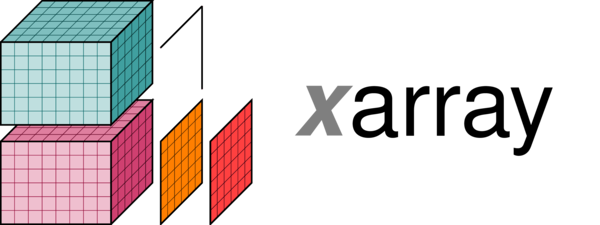

##**a) Leitura do arquivo Netcdf**

- **Importando a biblioteca xarray**

In [8]:
import xarray as xr

- **Leitura do dado**: vamos ler o aquivo **S10635346_202001231200.nc** que esta na pasta **input** do seu drive. As informações no nome do arquivo significam:
    1. **S10635346**: código do dados do canal ch13 do GOES-16
    2. **202001231200**: ano, mês, dia, hora e minuto
    3. **nc**: formato do dados. Nesse caso netcdf

In [9]:
# nome do arquivo
file = f'{dir}input/S10635346_202001231200.nc'

In [10]:
# mostra o nome do arquivo com o caminho
file

'/content/drive/MyDrive/00_DISPONIBILIZAÇÃO_DE_AULAS/2_SEGUNDO_SEMESTRE/CAT010 - APLICAÇÕES DOS SATÉLITES EM CIÊNCIAS ATMOSFÉRICAS/AULAS/CAT010 - PYTHON PARA SATÉLITES METEOROLÓGICOS/AULA_01_PLOTA_IMAGENS_SATELITE/input/S10635346_202001231200.nc'

Para ler o arquivo netcdf usaremos a função **open_dataset** do xarray.

In [11]:
# leitura do arquivo
imagem = xr.open_dataset(file)

##**b) Conhecendo o dado**
* Com os dados disponíveis, o `Xarray` interpreta-os como um objeto chamado de `Dataset`.

In [12]:
type(imagem)

xarray.core.dataset.Dataset

- **Mostrando o dado que foi lido**:


Arquivos em netcdf são auto-descritivos, o que significa que eles possuem uma grande quantidade de **meta-dados** e informações sobre eles dentro de sua própria estrutura;

O `Xarray` consegue mostrar todas essas informações de uma maneira bem interativa com **Jupyter Notebooks**.

In [13]:
imagem

<xarray.Dataset>
Dimensions:  (lat: 3131, lon: 3131)
Coordinates:
  * lat      (lat) float64 -55.99 -55.96 -55.93 -55.9 ... 34.9 34.93 34.96 34.99
  * lon      (lon) float64 -116.0 -116.0 -115.9 -115.9 ... -25.07 -25.04 -25.01
Data variables:
    Band1    (lat, lon) float64 ...
    crs      |S1 ...
Attributes:
    Conventions:  CF-1.5
    GDAL:         GDAL 2.2.2, released 2017/09/15
    history:      Thu Jan 23 12:13:13 2020: GDAL Create( /dados/output/goes16...

- **Informações gerais sobre o dataset**

In [14]:
imagem.info()

xarray.Dataset {
dimensions:
	lat = 3131 ;
	lon = 3131 ;

variables:
	float64 Band1(lat, lon) ;
		Band1:long_name = GDAL Band Number 1 ;
		Band1:grid_mapping = crs ;
	|S1 crs() ;
		crs:grid_mapping_name = latitude_longitude ;
		crs:long_name = CRS definition ;
		crs:longitude_of_prime_meridian = 0.0 ;
		crs:semi_major_axis = 6378137.0 ;
		crs:inverse_flattening = 298.257223563 ;
		crs:spatial_ref = GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]] ;
		crs:GeoTransform = -116 0.02906419674225487 0 35 0 -0.02906419674225487  ;
	float64 lat(lat) ;
		lat:standard_name = latitude ;
		lat:long_name = latitude ;
		lat:units = degrees_north ;
	float64 lon(lon) ;
		lon:standard_name = longitude ;
		lon:long_name = longitude ;
		lon:units = degrees_east ;

// global attributes:
	:Conventions 

- **Variáveis do dataset**

In [15]:
imagem.data_vars

Data variables:
    Band1    (lat, lon) float64 ...
    crs      |S1 ...

- **Matriz de temperatura**

In [16]:
# em formato de dataset do xarray
imagem['Band1']

<xarray.DataArray 'Band1' (lat: 3131, lon: 3131)>
[9803161 values with dtype=float64]
Coordinates:
  * lat      (lat) float64 -55.99 -55.96 -55.93 -55.9 ... 34.9 34.93 34.96 34.99
  * lon      (lon) float64 -116.0 -116.0 -115.9 -115.9 ... -25.07 -25.04 -25.01
Attributes:
    long_name:     GDAL Band Number 1
    grid_mapping:  crs

- **Matriz de latitude**

In [17]:
imagem['lat']

<xarray.DataArray 'lat' (lat: 3131)>
array([-55.985468, -55.956404, -55.92734 , ...,  34.92734 ,  34.956404,
        34.985468])
Coordinates:
  * lat      (lat) float64 -55.99 -55.96 -55.93 -55.9 ... 34.9 34.93 34.96 34.99
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north

- **Matriz de longitude**

In [18]:
imagem['lon']

<xarray.DataArray 'lon' (lon: 3131)>
array([-115.985468, -115.956404, -115.92734 , ...,  -25.07266 ,  -25.043596,
        -25.014532])
Coordinates:
  * lon      (lon) float64 -116.0 -116.0 -115.9 -115.9 ... -25.07 -25.04 -25.01
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east

- **Tamanho da matriz de temperatura**

In [20]:
imagem['Band1'].shape

(3131, 3131)

- **Dimensão dos dados**

In [21]:
imagem.dims

Frozen({'lat': 3131, 'lon': 3131})

- **Coordenadas dos dados**

In [22]:
imagem.coords

Coordinates:
  * lat      (lat) float64 -55.99 -55.96 -55.93 -55.9 ... 34.9 34.93 34.96 34.99
  * lon      (lon) float64 -116.0 -116.0 -115.9 -115.9 ... -25.07 -25.04 -25.01

- **Atributos globais dos dados**

In [23]:
imagem.attrs

{'Conventions': 'CF-1.5',
 'GDAL': 'GDAL 2.2.2, released 2017/09/15',
 'history': 'Thu Jan 23 12:13:13 2020: GDAL Create( /dados/output/goes16_ch13/tmp/OR_ABI-L2-CMIPF-M6C13_G16_s20200231200166_e20200231209486_c20200231209577_ret.nc.tmp, ... )'}

- **Acessando um pixel da matriz de dados**: nesse caso selecionarfemos o pixel com índice de latitude 0 e longitude 0.
- Importante lembrar que os dados de temperatura de brilho estão em Kelvin e multiplicado por 100. Por isso os valores variam entre 0 e 30000 K. Por exemplo, o valor abaixo (24208.) torna-se 242.08 K.

In [24]:
imagem['Band1'][0,0].values

array(24208.)

- **Plotando rapidamente uma imagem**: o xarray (usado para ler o dado netcdf) possui uma conexão com o matplolib. Então para plotar uma figura rapidamente basta usarmos a função **.plot()**. Como temos uma imagem grande (3131 colunas x 3131 linhas) levará aproximadamente 2 min para plotar a imagem.

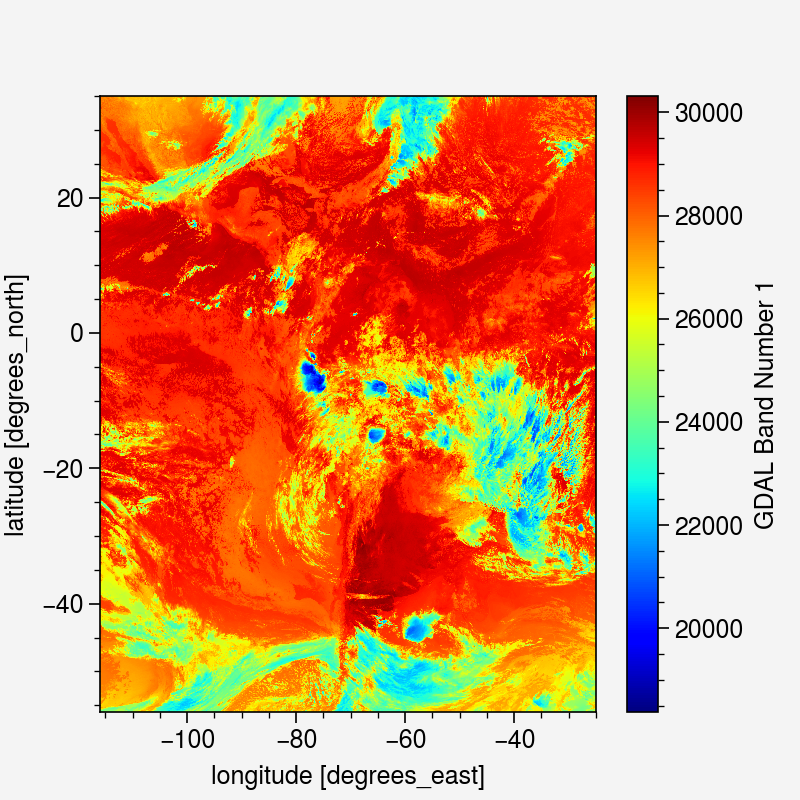

In [25]:
# plotando o dado
imagem['Band1'].plot(cmap='jet')

- **Recortando (chamado também de slicing) a imagem**: na imagem anterior plotamos a figura abrangendo toda a região do arquivo. Porém, se quiseremos plotar apenas uma parte da imagem, teremos que usar uma metodologia chamada de **slicing**. Para isto, o xarray possui uma função chamada de **sel()**.
- Com essa função podemos fazer um recorte em latitude, longitude e etc. Nesse exemplo faremos um recorte para uma região entre -65 e -33 graus de longitude (*lon=slice(-65, -33)*) e -45 e -18 graus de latitude (*lat=slice(-45, -18)*). Em seguida plotaremos a figura usando a função **plot()**.

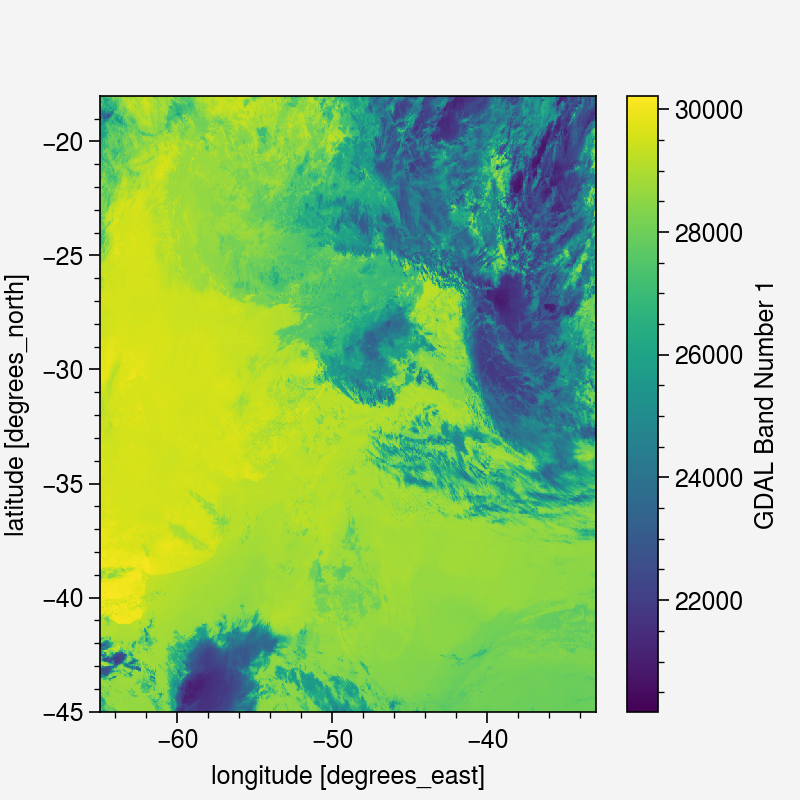

In [26]:
imagem['Band1'].sel(lon=slice(-65, -33), lat=slice(-45, -18)).plot()

# **PARTE 2):** Leitura da imagem e plotagem completa
- A imagem anterior que produzimos é bem simples e pode ficar mais completa ainda. Gostaríamos de produzir uma imagem igual a gerada pelo [CPTEC](http://satelite.cptec.inpe.br/repositoriogoes/goes16/goes16_web/ams_ret_ch13_baixa/2020/01/S11635388_202001231200.jpg).
- Assim, para a imagem ficar mais completa precisamos inserir as seguintes propriedades na imagem:
    1. Contornos dos Estados Brasileiros
    2. Cores na imagem
    3. Barra de cores
    4. Título na imagem
    5. Temperatura em graus Celsius

## **a) Extrai informações importantes da imagem**

In [27]:
# nome completo do arquivo = caminho + nome do arquivo
file

'/content/drive/MyDrive/00_DISPONIBILIZAÇÃO_DE_AULAS/2_SEGUNDO_SEMESTRE/CAT010 - APLICAÇÕES DOS SATÉLITES EM CIÊNCIAS ATMOSFÉRICAS/AULAS/CAT010 - PYTHON PARA SATÉLITES METEOROLÓGICOS/AULA_01_PLOTA_IMAGENS_SATELITE/input/S10635346_202001231200.nc'

In [28]:
# extrai o nome do arquivo
# Exemplo: muda de '/content/drive/MyDrive/CAT010 - PYTHON PARA SATÉLITES METEOROLÓGICOS/AULA_01_PLOTA_IMAGENS_SATÉLITE/input/S10635346_202001231200.nc'
#          para 'S10635346_202001231200.nc'
basename = os.path.basename(os.path.splitext(file)[0])

In [29]:
# mostra basename
print(basename)

S10635346_202001231200


In [30]:
# extrai a data da imagem
ano, mes, dia, hor, minu = basename[10:14], basename[14:16], basename[16:18], basename[18:20], basename[20:22]

In [31]:
# imprime a data
print(ano, mes, dia, hor, minu)

2020 01 23 12 00


In [32]:
# Extrai os limites das latitudes e longitudes
latmin, latmax, lonmin, lonmax = float(imagem['lat'][0]), float(imagem['lat'][-1]), float(imagem['lon'][0]), float(imagem['lon'][-1])

In [33]:
# imprime e latitudes minínimas e máximas
latmin, latmax, lonmin, lonmax

(-55.98546790162887,
 34.985467901628866,
 -115.98546790162887,
 -25.014532098371134)

In [34]:
# Os dados estão em Kelvin e multiplicado por 100.
# Por isso teremos que dividir os dados por 100 e subtrair -273.15 para transformar de Kelvin para Celsius
imagem = (imagem['Band1']/100.)-273.15

In [35]:
# mostra os dados
imagem

<xarray.DataArray 'Band1' (lat: 3131, lon: 3131)>
array([[-31.07, -31.07, -34.7 , ..., -21.61, -21.11, -21.11],
       [-29.59, -29.59, -31.07, ..., -19.64, -19.52, -19.52],
       [-29.04, -29.72, -29.72, ..., -19.52, -20.31, -20.31],
       ...,
       [  0.46,   0.46,   2.36, ...,   0.7 ,   5.68,   8.14],
       [  1.69,   2.91,   3.22, ...,  -0.9 ,   0.89,   5.  ],
       [  2.91,   2.91,   1.56, ...,  10.47,  10.47,   6.11]])
Coordinates:
  * lat      (lat) float64 -55.99 -55.96 -55.93 -55.9 ... 34.9 34.93 34.96 34.99
  * lon      (lon) float64 -116.0 -116.0 -115.9 -115.9 ... -25.07 -25.04 -25.01

## **b) Plota imagem**

Cria a moldura da figura

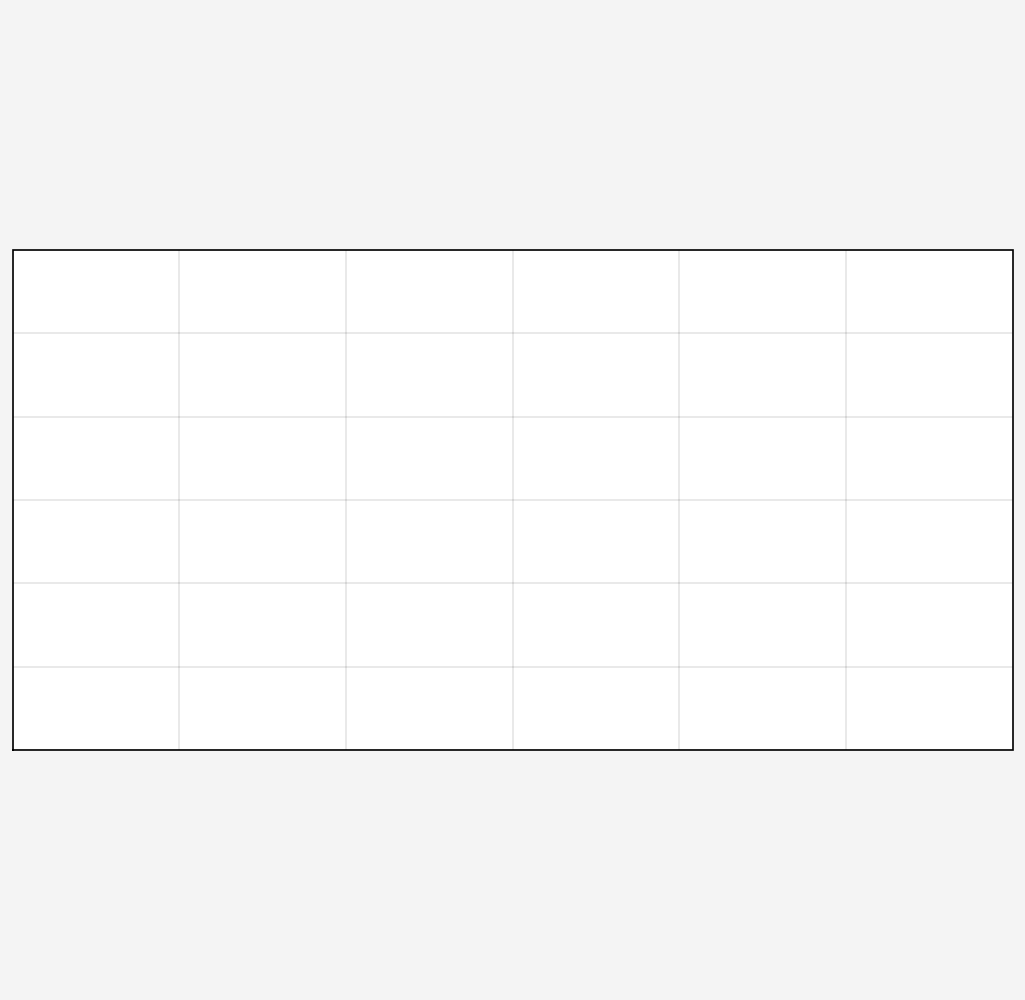

In [37]:
# cria a muldura da figura
fig, ax = pplt.subplots(axwidth=5, axheight=5, tight=True, proj='pcarree')

Insere o formato dos eixos

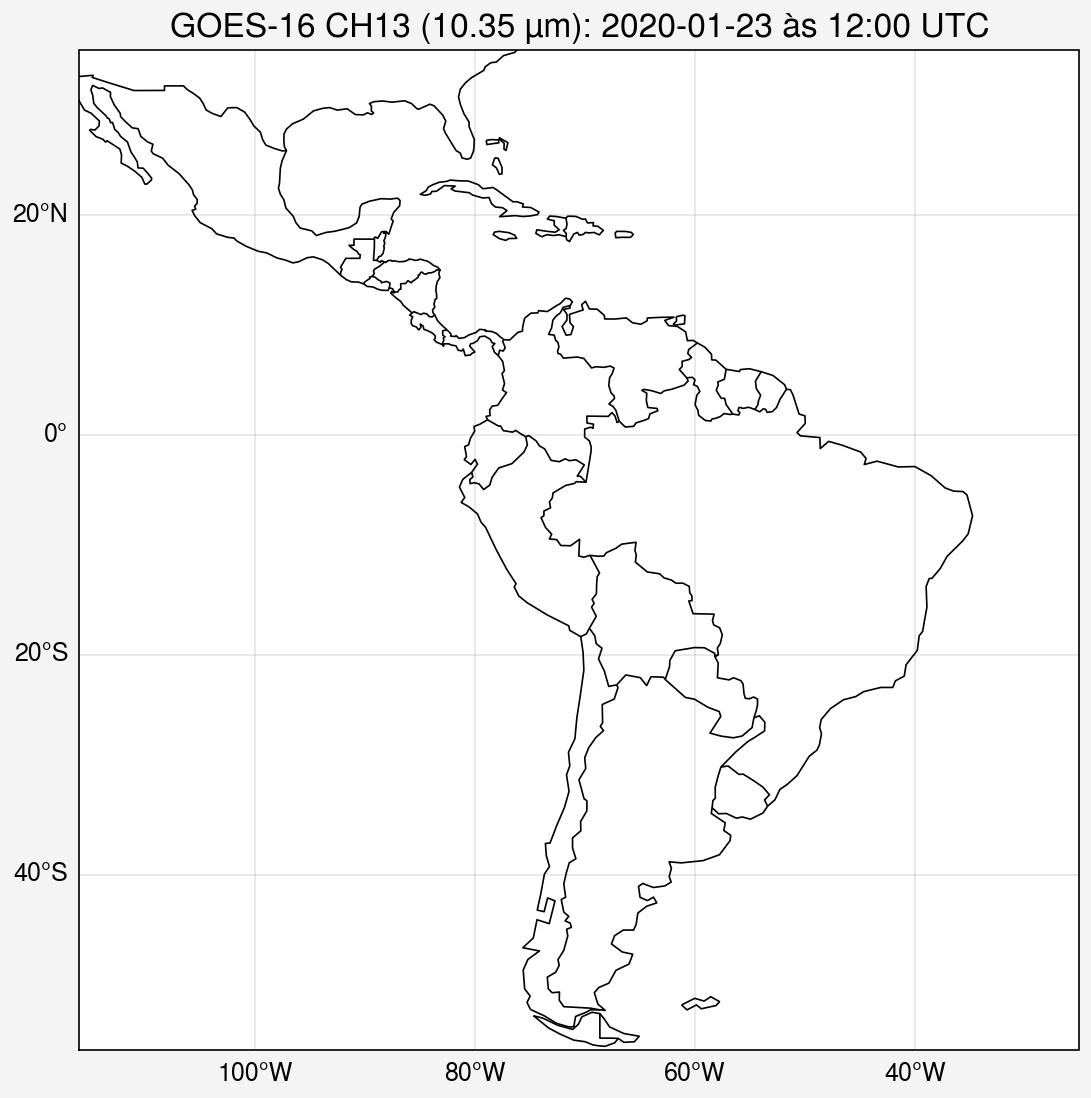

In [38]:
# cria a muldura da figura
fig, ax = pplt.subplots(axwidth=5, axheight=5, tight=True, proj='pcarree')

# define formato da figura
ax.format(coast=True, borders=True, innerborders=False,
          labels=True, latlines=20, lonlines=20,
          latlim=(latmin,latmax), lonlim=(lonmin,lonmax), fontsize=11,
          title=f'GOES-16 CH13 (10.35 µm): {ano}-{mes}-{dia} às {hor}:{minu} UTC')

Insere os dados na imagem

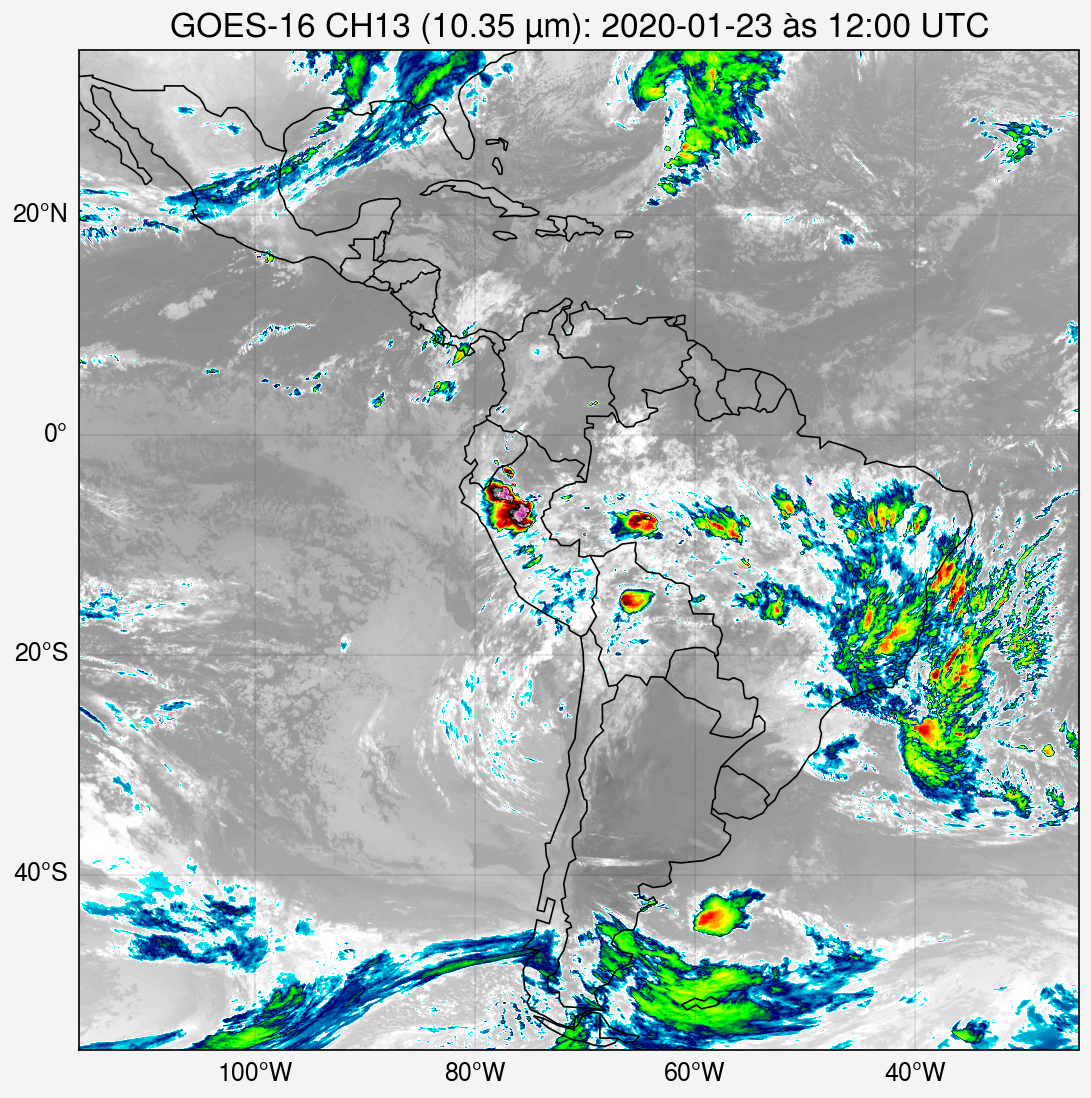

In [39]:
# cria a moldura da figura
fig, ax = pplt.subplots(axwidth=5, axheight=5, tight=True, proj='pcarree')

# define formato da figura
ax.format(coast=True, borders=True, innerborders=False,
          labels=True, latlines=20, lonlines=20,
          latlim=(latmin,latmax), lonlim=(lonmin,lonmax), fontsize=11,
          title=f'GOES-16 CH13 (10.35 µm): {ano}-{mes}-{dia} às {hor}:{minu} UTC')

# carrega tabela de cores
cpt_ir = loadCPT(f'{dir}ir.cpt')
cmap_ir = cm.colors.LinearSegmentedColormap('cpt_ir', cpt_ir)

# plota mapa
map1 = ax.imshow(np.flipud(imagem),
                 cmap=cmap_ir,
                 extent=[lonmin, lonmax, latmin, latmax],
                 levels=pplt.arange(-103.0, 105, 1.0))

Insere os contornos dos Estados do Brasil

SubplotGrid(nrows=1, ncols=1, length=1)

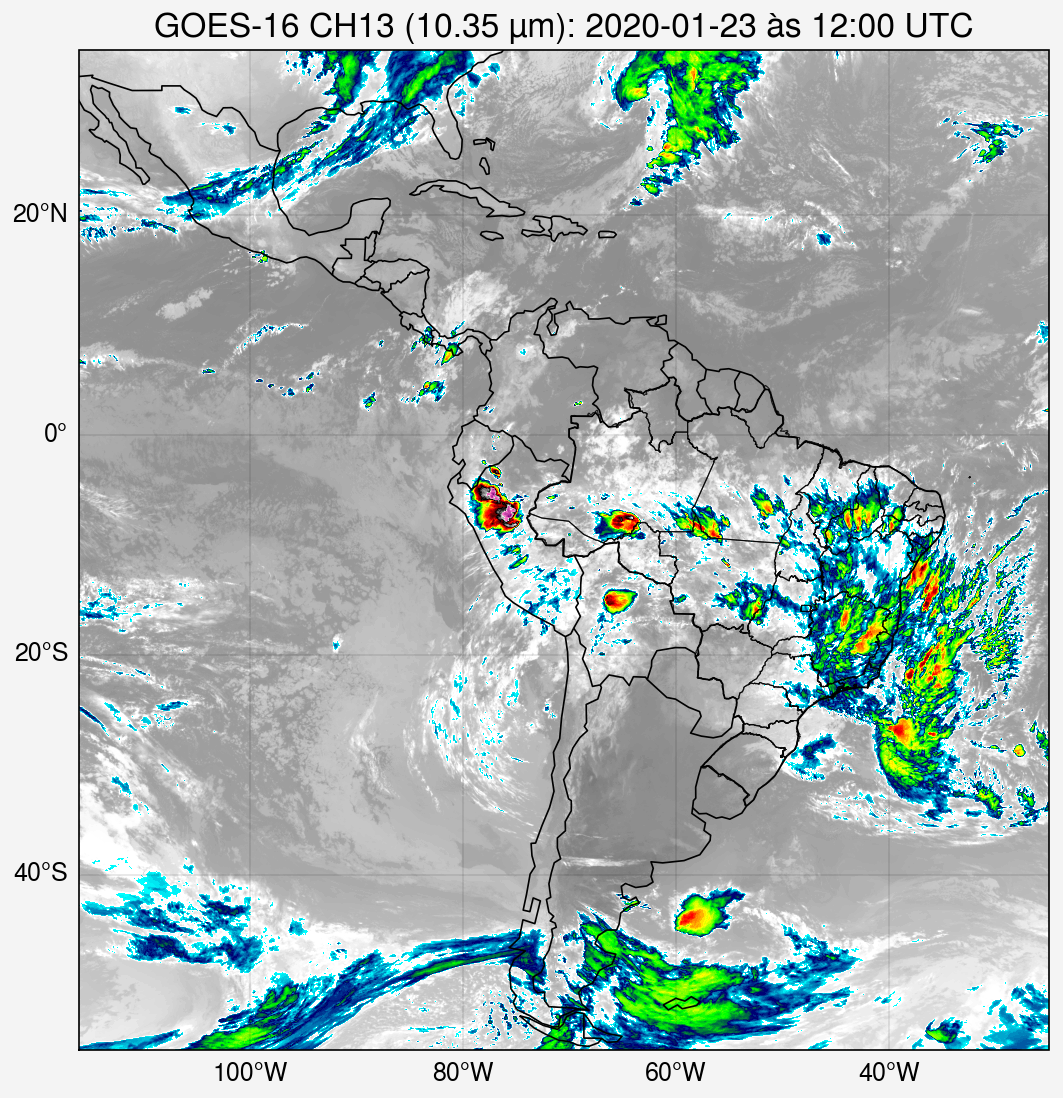

In [40]:
# cria a muldura da figura
fig, ax = pplt.subplots(axwidth=5, axheight=5, tight=True, proj='pcarree')

# define formato da figura
ax.format(coast=True, borders=True, innerborders=False,
          labels=True, latlines=20, lonlines=20,
          latlim=(latmin,latmax), lonlim=(lonmin,lonmax), fontsize=11,
          title=f'GOES-16 CH13 (10.35 µm): {ano}-{mes}-{dia} às {hor}:{minu} UTC')

# carrega tabela de cores
cpt_ir = loadCPT(f'{dir}ir.cpt')
cmap_ir = cm.colors.LinearSegmentedColormap('cpt_ir', cpt_ir)

# plota mapa
map1 = ax.imshow(np.flipud(imagem),
                 cmap=cmap_ir,
                 extent=[lonmin, lonmax, latmin, latmax],
                 levels=pplt.arange(-103.0, 105, 1.0))

# plota contornos dos Estados
estados.plot(edgecolor='black', facecolor='none', linewidth=0.4, alpha=0.8, ax=ax)

Insere a barra de cores

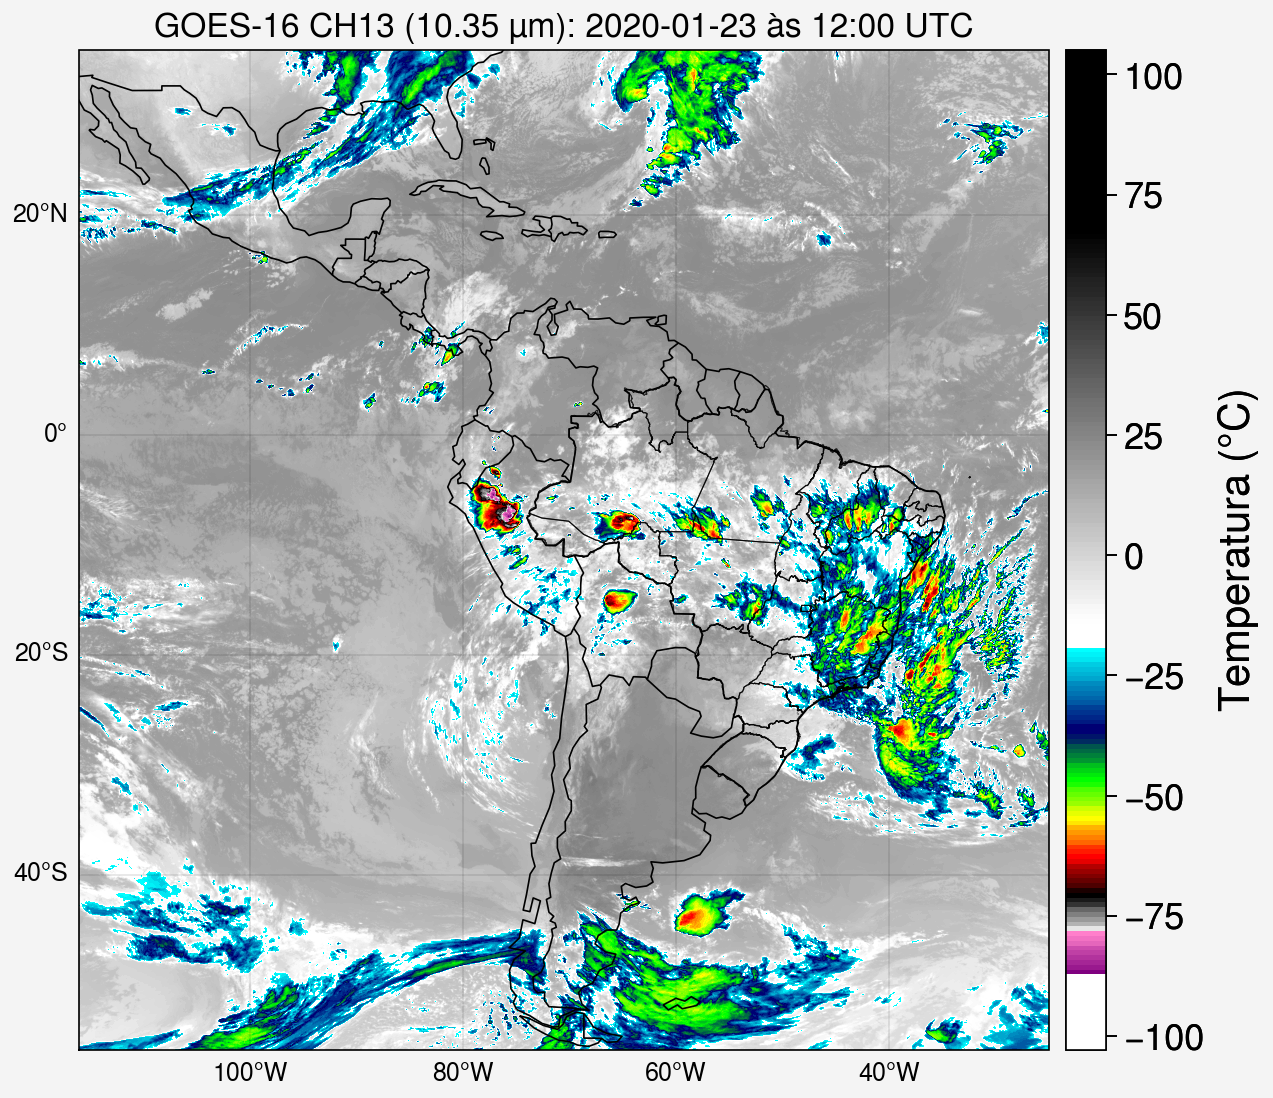

In [41]:
# cria a moldura da figura
fig, ax = pplt.subplots(axwidth=5, axheight=5, tight=True, proj='pcarree')

# define formato da figura
ax.format(coast=True, borders=True, innerborders=False,
          labels=True, latlines=20, lonlines=20,
          latlim=(latmin,latmax), lonlim=(lonmin,lonmax), fontsize=11,
          title=f'GOES-16 CH13 (10.35 µm): {ano}-{mes}-{dia} às {hor}:{minu} UTC')

# carrega tabela de cores
cpt_ir = loadCPT(f'{dir}ir.cpt')
cmap_ir = cm.colors.LinearSegmentedColormap('cpt_ir', cpt_ir)

# plota mapa
map1 = ax.imshow(np.flipud(imagem),
                 cmap=cmap_ir,
                 extent=[lonmin, lonmax, latmin, latmax],
                 levels=pplt.arange(-103.0, 105, 1.0))

# plota contornos dos Estados
estados.plot(edgecolor='black', facecolor='none', linewidth=0.4, alpha=0.8, ax=ax)

# plota barra de cores da figura
fig.colorbar(map1, loc='r', label='Temperatura ($\degree$C)', ticks=25, ticklabelsize=13, labelsize=15, space=0.1)

Salva a figura no Drive

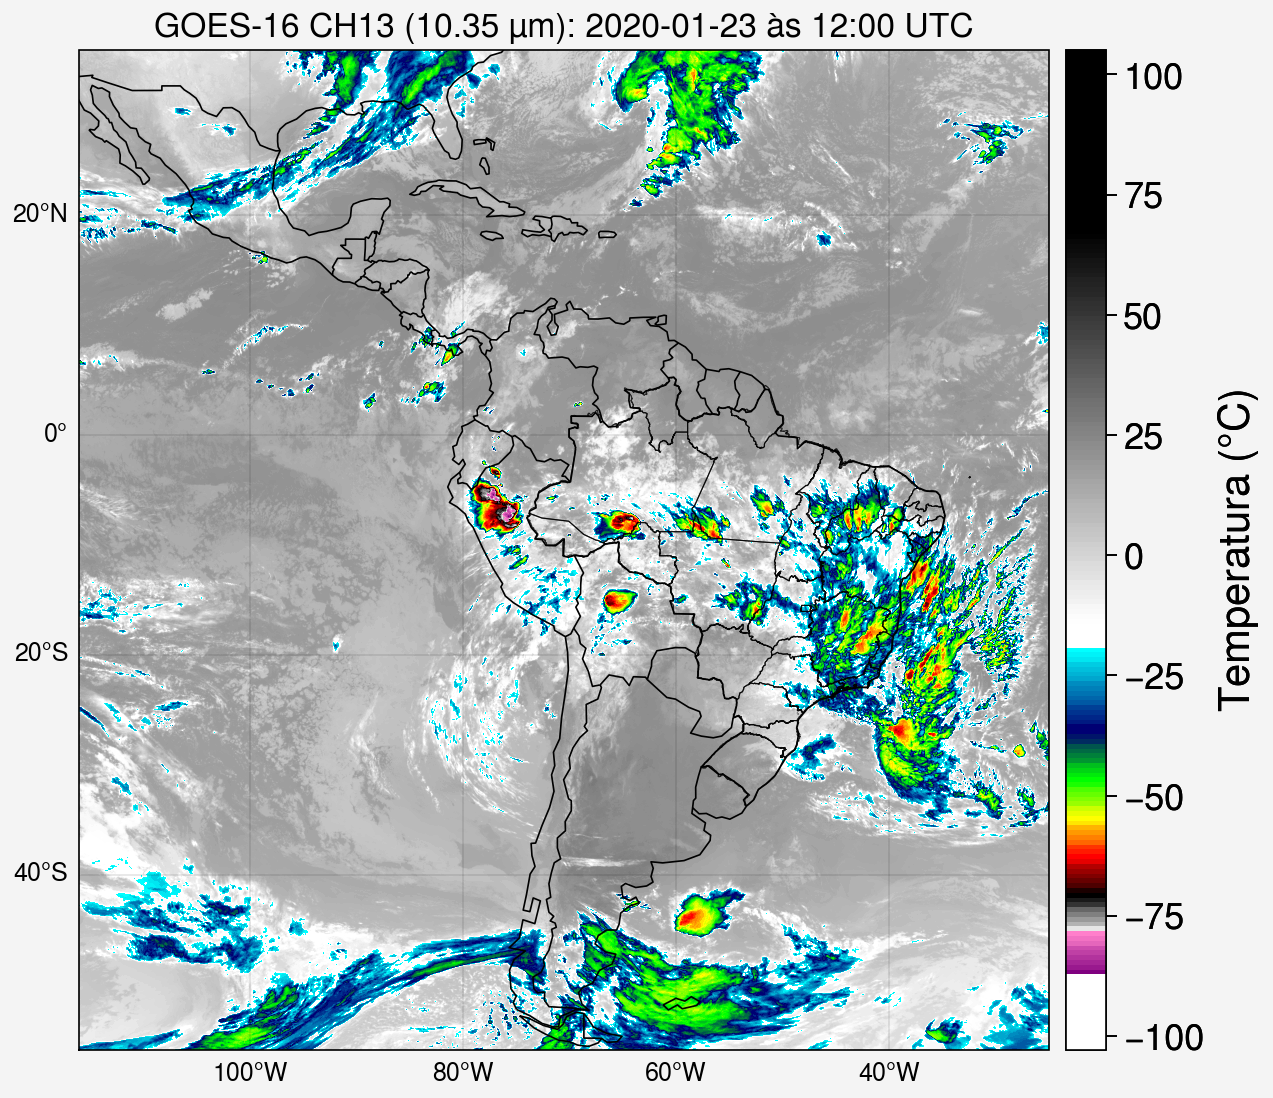

In [42]:
# cria a muldura da figura
fig, ax = pplt.subplots(axwidth=5, axheight=5, tight=True, proj='pcarree')

# define formato da figura
ax.format(coast=True, borders=True, innerborders=False,
          labels=True, latlines=20, lonlines=20,
          latlim=(latmin,latmax), lonlim=(lonmin,lonmax), fontsize=11,
          title=f'GOES-16 CH13 (10.35 µm): {ano}-{mes}-{dia} às {hor}:{minu} UTC')

# carrega tabela de cores
cpt_ir = loadCPT(f'{dir}ir.cpt')
cmap_ir = cm.colors.LinearSegmentedColormap('cpt_ir', cpt_ir)

# plota mapa
map1 = ax.imshow(np.flipud(imagem),
                 cmap=cmap_ir,
                 extent=[lonmin, lonmax, latmin, latmax],
                 levels=pplt.arange(-103.0, 105, 1.0))

# plota contornos dos Estados
estados.plot(edgecolor='black', facecolor='none', linewidth=0.4, alpha=0.8, ax=ax)

# plota barra de cores da figura
fig.colorbar(map1, loc='r', label='Temperatura ($\degree$C)', ticks=25, ticklabelsize=13, labelsize=15, space=0.1)

# salva figura
fig.save(f'{dir}output/parte_1_goes16_ch13_{ano}{mes}{dia}_{hor}{minu}.jpg', dpi=300, bbox_inches='tight')

# exibe a figura na tela
pplt.show()

# **PARTE 3):**  Leitura de várias imagens e plotagem completa
- No exemplo anterior plotamos apenas uma única imagem. Porém, se quisermos produzir 5, 10 ou 20 imagens, como poderíamos fazer? Teríamos que mudar o horário e produzir uma de cada vez?
- Para isto usaremos o conceito de loop. Usaremos uma estrutura de repetição, nesse caso será o comando **for** do python. Maiores informações sobre o comando for acesse [aqui](https://pythonacademy.com.br/blog/estruturas-de-repeticao#:~:text=O%20for%20%C3%A9%20utilizado%20para,utilizando%20for%20n%C3%A3o%20%C3%A9%20diferente.).
- Antes de usar o Loop precisaremos indicar para o computador quais arquivos serão lidos. Assim teremos que montar uma lista com os nomes desses arquivos, e para isto usaremos o comando [**glob**](https://pt.linuxteaching.com/article/python_glob_function#what_is_the_glob_function_in_python).

- **Monta lista com os nomes dos arquivos na pasta de entrada (=input)**. Aqui será listado todos os arquivos **nc** que estão na pasta *input* do seu drive.

In [43]:
files = sorted(glob.glob(f'{dir}input/*nc'))
files

['/content/drive/MyDrive/00_DISPONIBILIZAÇÃO_DE_AULAS/2_SEGUNDO_SEMESTRE/CAT010 - APLICAÇÕES DOS SATÉLITES EM CIÊNCIAS ATMOSFÉRICAS/AULAS/CAT010 - PYTHON PARA SATÉLITES METEOROLÓGICOS/AULA_01_PLOTA_IMAGENS_SATELITE/input/S10635346_202001231200.nc',
 '/content/drive/MyDrive/00_DISPONIBILIZAÇÃO_DE_AULAS/2_SEGUNDO_SEMESTRE/CAT010 - APLICAÇÕES DOS SATÉLITES EM CIÊNCIAS ATMOSFÉRICAS/AULAS/CAT010 - PYTHON PARA SATÉLITES METEOROLÓGICOS/AULA_01_PLOTA_IMAGENS_SATELITE/input/S10635346_202001231210.nc',
 '/content/drive/MyDrive/00_DISPONIBILIZAÇÃO_DE_AULAS/2_SEGUNDO_SEMESTRE/CAT010 - APLICAÇÕES DOS SATÉLITES EM CIÊNCIAS ATMOSFÉRICAS/AULAS/CAT010 - PYTHON PARA SATÉLITES METEOROLÓGICOS/AULA_01_PLOTA_IMAGENS_SATELITE/input/S10635346_202001231220.nc',
 '/content/drive/MyDrive/00_DISPONIBILIZAÇÃO_DE_AULAS/2_SEGUNDO_SEMESTRE/CAT010 - APLICAÇÕES DOS SATÉLITES EM CIÊNCIAS ATMOSFÉRICAS/AULAS/CAT010 - PYTHON PARA SATÉLITES METEOROLÓGICOS/AULA_01_PLOTA_IMAGENS_SATELITE/in

Para não demorar muito o processamento, vamos processar apenas 5 imagens. Para processar todas imagens, basta comentar (inserir `#` na frente da linha de comando) desta linha.

In [44]:
files = files[0:3]
files

['/content/drive/MyDrive/00_DISPONIBILIZAÇÃO_DE_AULAS/2_SEGUNDO_SEMESTRE/CAT010 - APLICAÇÕES DOS SATÉLITES EM CIÊNCIAS ATMOSFÉRICAS/AULAS/CAT010 - PYTHON PARA SATÉLITES METEOROLÓGICOS/AULA_01_PLOTA_IMAGENS_SATELITE/input/S10635346_202001231200.nc',
 '/content/drive/MyDrive/00_DISPONIBILIZAÇÃO_DE_AULAS/2_SEGUNDO_SEMESTRE/CAT010 - APLICAÇÕES DOS SATÉLITES EM CIÊNCIAS ATMOSFÉRICAS/AULAS/CAT010 - PYTHON PARA SATÉLITES METEOROLÓGICOS/AULA_01_PLOTA_IMAGENS_SATELITE/input/S10635346_202001231210.nc',
 '/content/drive/MyDrive/00_DISPONIBILIZAÇÃO_DE_AULAS/2_SEGUNDO_SEMESTRE/CAT010 - APLICAÇÕES DOS SATÉLITES EM CIÊNCIAS ATMOSFÉRICAS/AULAS/CAT010 - PYTHON PARA SATÉLITES METEOROLÓGICOS/AULA_01_PLOTA_IMAGENS_SATELITE/input/S10635346_202001231220.nc']

- **Plota imagens**: o comando **for** a seguir irá ler cada arquivo dentro da lista **files** e plotará cada imagem de satélite.

In [45]:
# Loop das imagens
for file in tqdm_notebook(files):

    print('....PROCESSANDO--->>>', file)

    #------------------------------------#
    #      Leitura do dado
    #------------------------------------#
    # nome do arquivo. Exemplo: muda de '/content/drive/MyDrive/1-AULAS/2022.2/CAT010 - PYTHON PARA SATÉLITES METEOROLÓGICOS/AULA_01_PLOTA_IMAGENS_SATÉLITE/input/S10635346_202001231200.nc' para 'S10635346_202001231200.nc'
    basename = os.path.basename(os.path.splitext(file)[0])

    # extrai a data da imagem
    ano, mes, dia, hor, minu = basename[10:14], basename[14:16], basename[16:18], basename[18:20], basename[20:22]

    # leitura do arquivo NetCdf
    imagem_raw = xr.open_dataset(file)#.sel(lon=slice(-40, -30), lat=slice(-20, -10))

    # Divide por 100 e transforma para Celsius
    imagem = (imagem_raw['Band1']/100.)-273.15

    # Extrai os limites das latitudes e longitudes
    latmin, latmax, lonmin, lonmax = float(imagem['lat'][0]), float(imagem['lat'][-1]), float(imagem['lon'][0]), float(imagem['lon'][-1])

    #------------------------------------#
    #          Plotando a figura
    #------------------------------------#
    # cria a moldura da figura
    fig, ax = pplt.subplots(axwidth=5, axheight=5, tight=True, proj='pcarree')

    # define formato da figura
    ax.format(coast=True, borders=True, innerborders=False,
              labels=True, latlines=20, lonlines=20,
              latlim=(latmin,latmax), lonlim=(lonmin,lonmax), fontsize=11,
              title=f'GOES-16 CH13 (10.35 µm): {ano}-{mes}-{dia} às {hor}:{minu} UTC')

    # carrega tabela de cores
    cpt_ir = loadCPT(f'{dir}ir.cpt')
    cmap_ir = cm.colors.LinearSegmentedColormap('cpt_ir', cpt_ir)

    # plota mapa
    map1 = ax.imshow(np.flipud(imagem),
                     cmap=cmap_ir,
                     extent=[lonmin, lonmax, latmin, latmax],
                     levels=pplt.arange(-103.0, 105, 1.0))

    # plota contornos dos Estados
    estados.plot(edgecolor='black', facecolor='none', linewidth=0.4, alpha=0.8, ax=ax)

    # plota barra de cores da figura
    fig.colorbar(map1, loc='r', label='Temperatura de Brilho ($\degree$C)', ticks=25, ticklabelsize=13, labelsize=15, space=0.1)

    # salva figura
    fig.save(f'{dir}output/parte_1_goes16_ch13_{ano}{mes}{dia}_{hor}{minu}.jpg', dpi=300, bbox_inches='tight')

    #break

Output hidden; open in https://colab.research.google.com to view.

# **PARTE 4):** Faz animação de imagens
- O objetivo aqui é montar uma animação com as imagens de satélites que foram geradas na pasta **output**. Para isto usaremos a biblioteca [imageio](https://imageio.readthedocs.io/en/stable/).

**Monta uma lista com as figuras que será feito animação**

In [50]:
files = sorted(glob.glob(f'{dir}output/parte_1_goes16_ch13_*.jpg'))
files

['/content/drive/MyDrive/00_DISPONIBILIZAÇÃO_DE_AULAS/2_SEGUNDO_SEMESTRE/CAT010 - APLICAÇÕES DOS SATÉLITES EM CIÊNCIAS ATMOSFÉRICAS/AULAS/CAT010 - PYTHON PARA SATÉLITES METEOROLÓGICOS/AULA_01_PLOTA_IMAGENS_SATELITE/output/parte_1_goes16_ch13_20200123_1200.jpg',
 '/content/drive/MyDrive/00_DISPONIBILIZAÇÃO_DE_AULAS/2_SEGUNDO_SEMESTRE/CAT010 - APLICAÇÕES DOS SATÉLITES EM CIÊNCIAS ATMOSFÉRICAS/AULAS/CAT010 - PYTHON PARA SATÉLITES METEOROLÓGICOS/AULA_01_PLOTA_IMAGENS_SATELITE/output/parte_1_goes16_ch13_20200123_1210.jpg',
 '/content/drive/MyDrive/00_DISPONIBILIZAÇÃO_DE_AULAS/2_SEGUNDO_SEMESTRE/CAT010 - APLICAÇÕES DOS SATÉLITES EM CIÊNCIAS ATMOSFÉRICAS/AULAS/CAT010 - PYTHON PARA SATÉLITES METEOROLÓGICOS/AULA_01_PLOTA_IMAGENS_SATELITE/output/parte_1_goes16_ch13_20200123_1220.jpg']

**Produz a animação**: para alterar a velocidade da animação basta alterar o atributo **fps** em **imageio.mimsave**.

In [51]:
# cria uma lista com as imagens
images = []
for file in files:
    images.append(imageio.imread(file))

In [52]:
# mostra a variável images
print(images)

[array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]

In [53]:
# salva em formato de animação de imagens
imageio.mimsave(f'{dir}output/parte_1_animacao_imagens.gif',
                images,
                duration=5,
                loop=0)

# **PARTE 5):** Leitura de várias imagens e plotagem completa em forma de painel.
- É comum termos que mostrar várias imagens em apenas uma figura, em forma de painel. Nesse exemplo, aprenderemos como plotar 12 imagens em uma única figura.
- Primeiro teremos que inserir os nomes dos 12 arquivos na variável **files**.

- **Monta lista com os nomes dos arquivos na pasta de entrada (=input)**

In [ ]:
files = ['S10635346_202001231200.nc',
         'S10635346_202001231210.nc',
         'S10635346_202001231220.nc',
         'S10635346_202001231230.nc',

         'S10635346_202001231240.nc',
         'S10635346_202001231250.nc',
         'S10635346_202001231300.nc',
         'S10635346_202001231310.nc',

         'S10635346_202001231320.nc',
         'S10635346_202001231330.nc',
         'S10635346_202001231340.nc',
         'S10635346_202001231350.nc']

files

['S10635346_202001231200.nc',
 'S10635346_202001231210.nc',
 'S10635346_202001231220.nc',
 'S10635346_202001231230.nc',
 'S10635346_202001231240.nc',
 'S10635346_202001231250.nc',
 'S10635346_202001231300.nc',
 'S10635346_202001231310.nc',
 'S10635346_202001231320.nc',
 'S10635346_202001231330.nc',
 'S10635346_202001231340.nc',
 'S10635346_202001231350.nc']

- **Plota imagem**

In [ ]:
# carrega tabela de cores
cpt_ir = loadCPT(f'{dir}ir.cpt')
cmap_ir = cm.colors.LinearSegmentedColormap('cpt_ir', cpt_ir)

In [ ]:
# limites da imagem
lonmin, lonmax, latmin, latmax = -51.3, -39.7, -23.0, -14.0

In [ ]:
# cria moldura da figura
fig, ax = pplt.subplots(ncols=3, nrows=4, axheight=6, tight=True, proj='pcarree')

# formatação dos eixos
ax.format(coast=False, borders=False, innerborders=False,
          labels=True, latlines=5, lonlines=5,
          latlim=(latmin, latmax), lonlim=(lonmin, lonmax),
          abc=True, abcstyle='(A)', abcsize=15,
          small='40px', large='55px',
          suptitle='GOES-16 CH13 (10.35 µm)')

# loop das imagens
for i, file in enumerate(files):

    #------------------------------------#
    #      Leitura do dado
    #------------------------------------#
    # nome do arquivo. Exemplo: muda de '/content/drive/MyDrive/1-AULAS/2022.2/CAT010 - PYTHON PARA SATÉLITES METEOROLÓGICOS/AULA_01_PLOTA_IMAGENS_SATÉLITE/input/S10635346_202001231200.nc' para 'S10635346_202001231200.nc'
    basename = os.path.basename(os.path.splitext(file)[0])

    print('PROCESSANDO ===>>>', basename)

    # extrai a data da imagem
    ano, mes, dia, hor, minu = basename[10:14], basename[14:16], basename[16:18], basename[18:20], basename[20:22]

    # leitura do arquivo NetCdf
    imagem_raw = xr.open_dataset(f'{dir}input/{file}').sel(lon=slice(lonmin, lonmax), lat=slice(latmin,latmax))

    # Divide por 100 e transforma para Celsius
    imagem = (imagem_raw['Band1']/100.)-273.15

    # Extrai os limites das latitudes e longitudes
    latmin, latmax, lonmin, lonmax = float(imagem['lat'][0]), float(imagem['lat'][-1]), float(imagem['lon'][0]), float(imagem['lon'][-1])

    #------------------------------------#
    #          Plotando a figura
    #------------------------------------#
    if i == 0:
        map1 = ax[i].imshow(np.flipud(imagem),
                     cmap=cmap_ir,
                     extent=[lonmin, lonmax, latmin, latmax],
                     levels=pplt.arange(-103.0, 105, 1.0))
    else:
        ax[i].imshow(np.flipud(imagem),
                     cmap=cmap_ir,
                     extent=[lonmin, lonmax, latmin, latmax],
                     levels=pplt.arange(-103.0, 105, 1.0))

    # plota contornos dos Estados
    estados.plot(edgecolor='black', facecolor='none', linewidth=0.8, alpha=0.8, ax=ax[i])

    # plota titulo de cada figura
    if (i==1 or i==2 or i==4 or i==5 or i==7 or i==8): ax[i].format(title=f'{ano}-{mes}-{dia} at {hor}:{minu} UTC', labels=False, linewidth=3)
    if (i==10 or i==11): ax[i].format(title=f'{ano}-{mes}-{dia} at {hor}:{minu} UTC', labels=[False, False, True, False], linewidth=3)
    if (i==0 or i==3 or i==6): ax[i].format(title=f'{ano}-{mes}-{dia} at {hor}:{minu} UTC', labels=[True, False, False, False], linewidth=3)
    if (i==9): ax[i].format(title=f'{ano}-{mes}-{dia} at {hor}:{minu} UTC', labels=[True, False, True, False], linewidth=3)

# plota barra de cores
fig.colorbar(map1, loc='b', label='Temperatura de Brilho ($\degree$C)', ticks=25, ticklabelsize=40, labelsize=40, width=0.5, length=0.7)

# sala figura
fig.save(f'{dir}output/parte_1_composicao_imagens.png', dpi=300)

Output hidden; open in https://colab.research.google.com to view.